In [1]:
!pip install resampy
!pip install librosa

import IPython.display as idp

import librosa
import librosa.display
import IPython.display as ipd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_df = pd.read_csv('/Users/trucle/Desktop/MATH250/Project/train.csv')

genre = pd.read_csv('/Users/trucle/Desktop/MATH250/Project/genres.csv')



https://www.kaggle.com/code/andradaolteanu/work-w-audio-data-visualise-classify-recommend 

In [4]:
# 010150 is label as instrumental
y,sr = librosa.load('/Users/trucle/Desktop/MATH250/Project/train/005121.ogg')
audio_file1, _ = librosa.effects.trim(y)
print('y:',y,'\n')
print('y shape:',np.shape(y),'\n')
print('Sample Rate (KHz):',sr, '\n')

y: [-1.8626451e-09  6.5192580e-09 -4.6566129e-09 ... -1.1634627e-01
 -1.4397231e-01 -1.0790167e-01] 

y shape: (661560,) 

Sample Rate (KHz): 22050 



In [7]:
audio_file1

array([-1.8626451e-09,  6.5192580e-09, -4.6566129e-09, ...,
       -1.1634627e-01, -1.4397231e-01, -1.0790167e-01], dtype=float32)

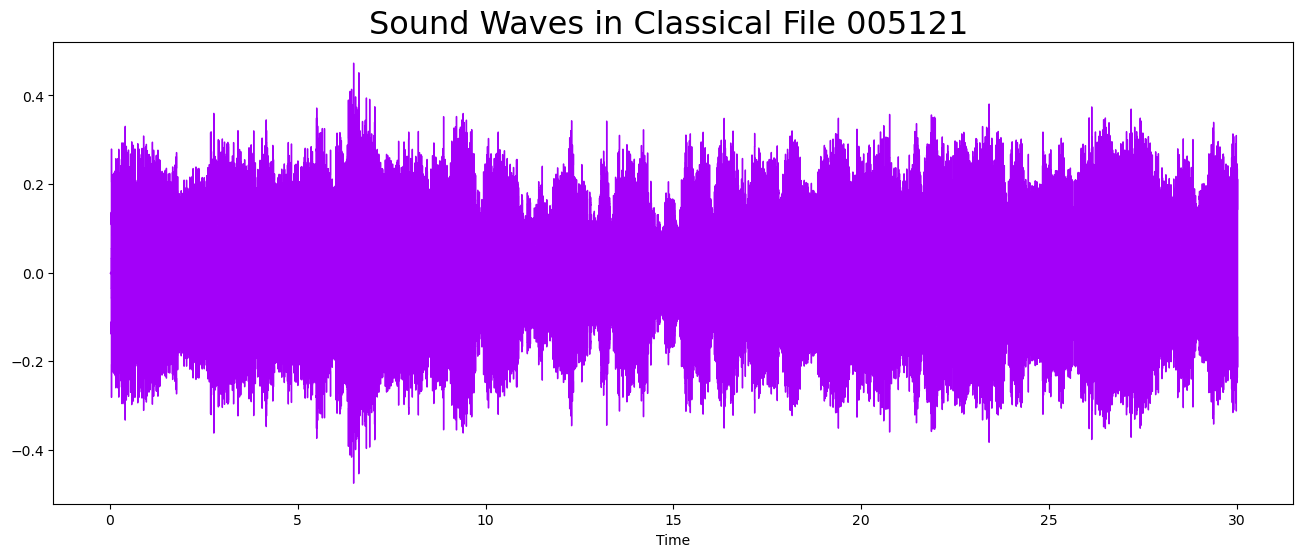

In [12]:

plt.figure(figsize = (16, 6))
librosa.display.waveshow(y = audio_file1, sr = sr, color = "#A300F9");
plt.title("Sound Waves in Classical File 005121 ", fontsize = 23);

y: [ 0.02947053  0.04452762  0.0416573  ... -0.10523427 -0.12509248
 -0.08596155] 

y shape: (661560,) 

Sample Rate (KHz): 22050 



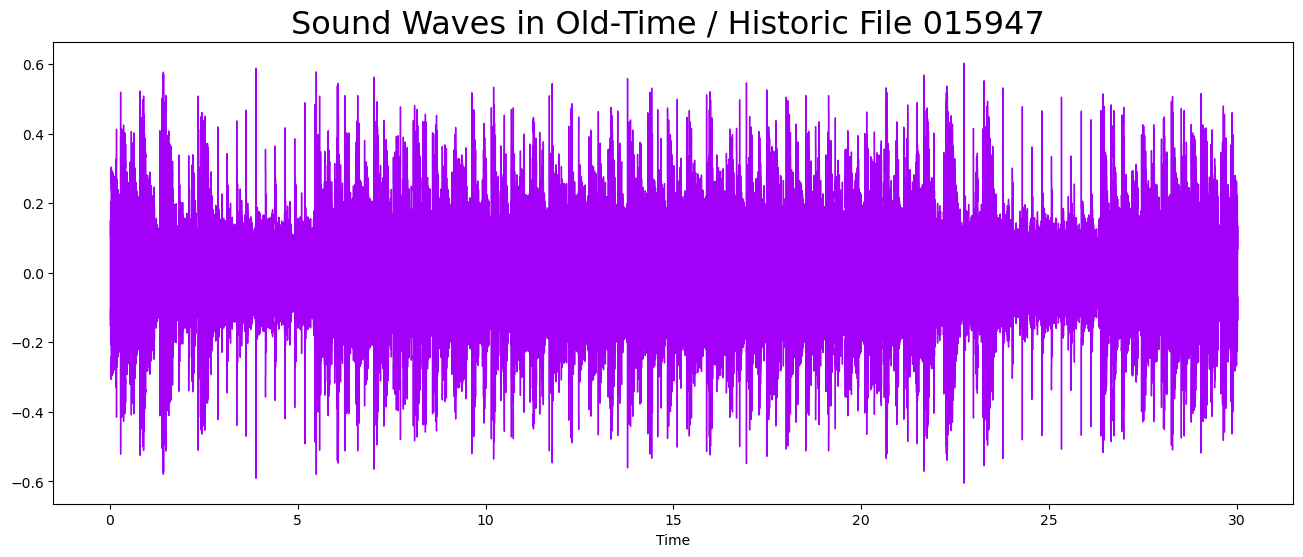

In [13]:
# 012181 is label as Electronic
y,sr = librosa.load('/Users/trucle/Desktop/MATH250/Project/train/015947.ogg')
audio_file2, _ = librosa.effects.trim(y)
print('y:',y,'\n')
print('y shape:',np.shape(y),'\n')
print('Sample Rate (KHz):',sr, '\n')
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y = audio_file2, sr = sr, color = "#A300F9");
plt.title("Sound Waves in Old-Time / Historic File 015947 ", fontsize = 23);

y: [-1.4156103e-06 -1.9222498e-06 -1.4752150e-06 ...  1.2415664e-01
  1.2300813e-01  5.6099325e-02] 

y shape: (660984,) 

Sample Rate (KHz): 22050 



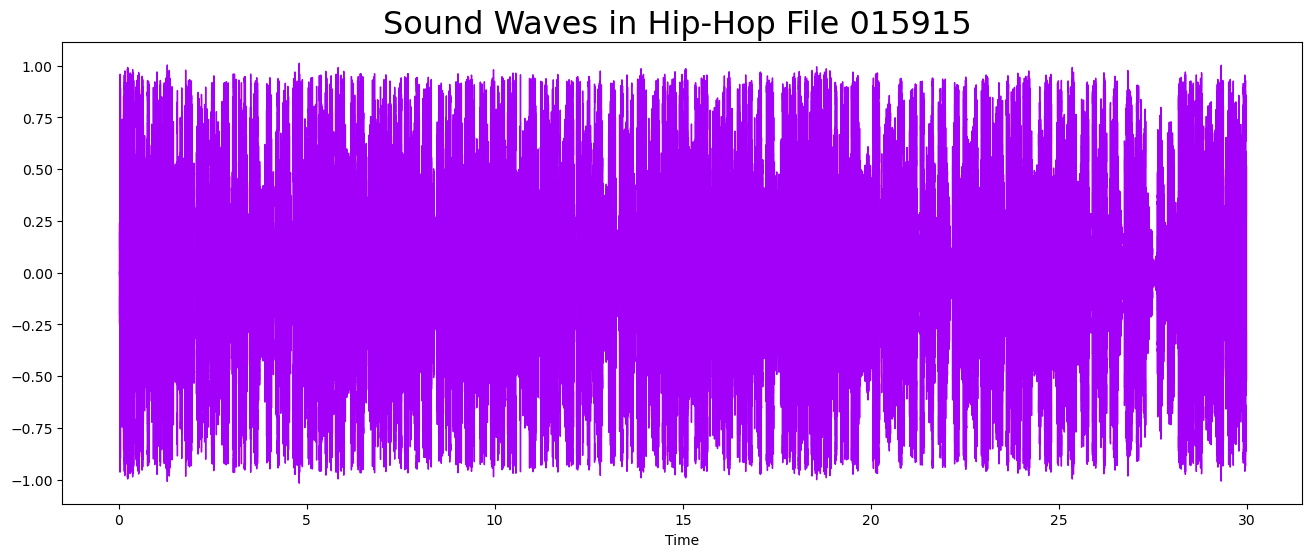

In [16]:
# 012181 is label as Electronic
y,sr = librosa.load('/Users/trucle/Desktop/MATH250/Project/train/015915.ogg')
audio_file2, _ = librosa.effects.trim(y)
print('y:',y,'\n')
print('y shape:',np.shape(y),'\n')
print('Sample Rate (KHz):',sr, '\n')
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y = audio_file2, sr = sr, color = "#A300F9");
plt.title("Sound Waves in Hip-Hop File 015915 ", fontsize = 23);

Fourier Transformation

Shape of D object: (1025, 1293)


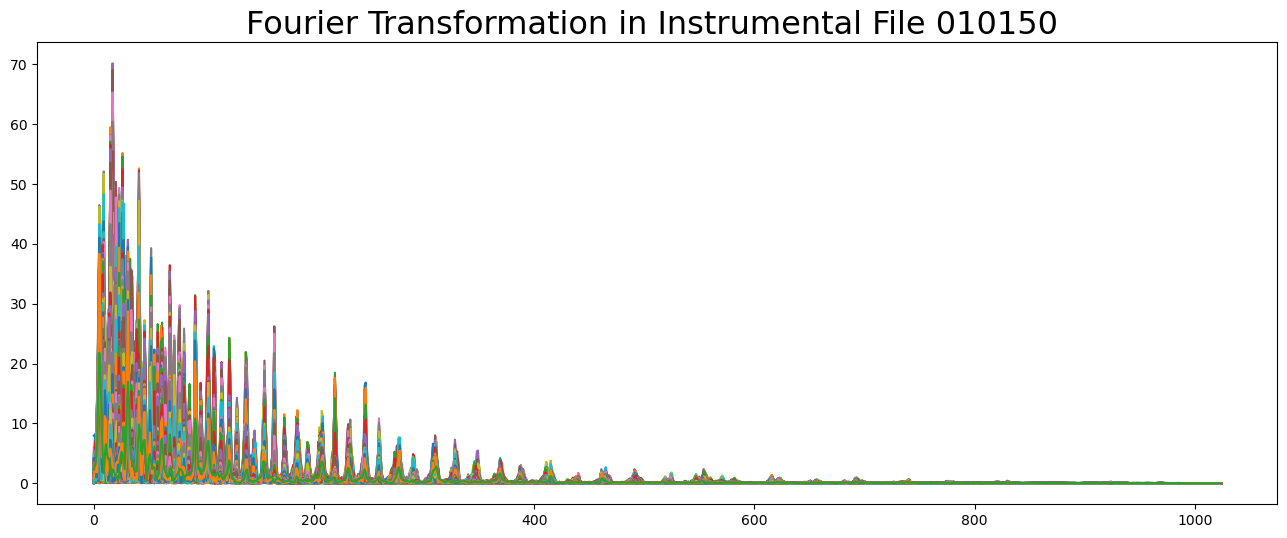

In [14]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(audio_file1, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object:', np.shape(D))
plt.figure(figsize = (16, 6))
plt.plot(D)
plt.title("Fourier Transformation in Instrumental File 005121 ", fontsize = 23);

Shape of D object: (1025, 1293)


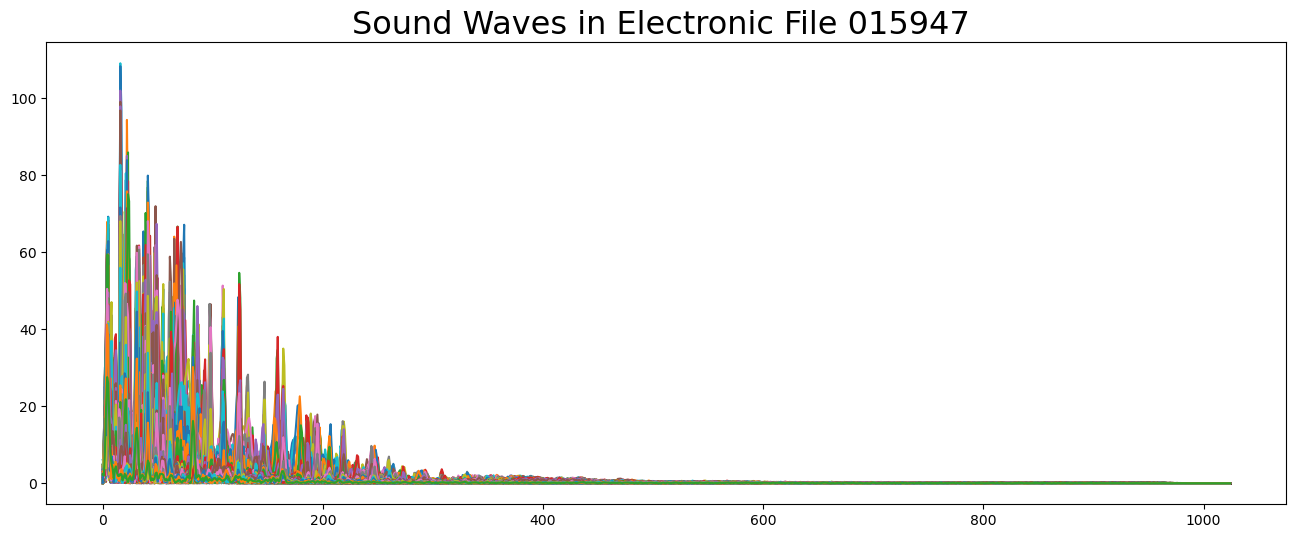

In [15]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(audio_file2, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object:', np.shape(D))
plt.figure(figsize = (16, 6))
plt.plot(D)
plt.title("Sound Waves in Electronic File 015947 ", fontsize = 23);

In [8]:
# https://www.kaggle.com/code/himanshu007121/covid-19-cough-classification
train_df = pd.read_csv('/Users/trucle/Desktop/MATH250/Project/train_2.csv')

genre = pd.read_csv('/Users/trucle/Desktop/MATH250/Project/genres.csv')
file = open('data_new_extended_2.csv', 'w')
header = 'filename genre_id length avg_contrast avg_harmonic avg_chroma_stft avg_rmse avg_spectral_centroid avg_spectral_bandwidth avg_rolloff avg_zero_crossing_rate'
for i in range(1, 21):
    header += f' avg_mfcc{i}'
header += ' label'
header = header.split()
tot_rows = train_df.shape[0]
with file:
    writer = csv.writer(file)
    writer.writerow(header)
for i in range(tot_rows):
        ID = train_df['song_id'][i]
        genre_id = train_df['genre_id'][i]
        source = train_df['filepath'][i]
        file_name = '/Users/trucle/Desktop/MATH250/Project/'+source
        y,sr = librosa.load(file_name)
        S,phase = librosa.magphase(librosa.stft(y))
        length = len(y)/sr
        contrast = librosa.feature.spectral_contrast(S=S,sr=sr)
        y_harmonic = librosa.effects.harmonic(y=y)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{ID} {genre_id} {length} {np.mean(contrast)} {np.mean(y_harmonic)} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        
        file = open('data_new_extended.csv', 'a')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

KeyboardInterrupt: 

: 